In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
ticker = "AAPL"
df = yf.download(ticker, start="2022-01-01", progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724564,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443588,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723587,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840225,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008133,86709100


In [8]:
def nvi_calculation(df):
    # nvi = (df['Close'] - df['Close'].shift(1))/df['Close']
    df['check'] = df['Close'].
    return df['Check']

df['test'] = df.apply(nvi_calculation, axis=1)
df.head()


AttributeError: 'numpy.float64' object has no attribute 'rolling'

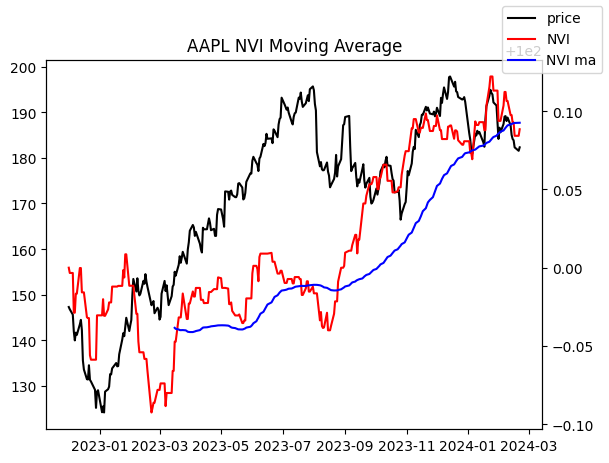

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.DataFrame({
#     'Volume': [100, 120, 90, 80, 110],
#     'Close': [10, 12, 9, 8, 11]
# })

df = yf.download("AAPL", start="2022-12-01", progress=False)
df = df.reset_index()
a = [100.0]
for i in range(1, len(df)):
    vol_prev = df.iloc[i-1, 6]
    vol = df.iloc[i, 6]
    # print(vol_prev, vol)
    nvi_prev = a[i-1]
    if vol < vol_prev:
        close = df.iloc[i, 5]
        close_prev = df.iloc[i-1, 5]
        
        nvi = nvi_prev + (close - close_prev)/close_prev
    else:
        nvi = nvi_prev
    a.append(nvi)
df["NVI"] = a
df['NVI_MA'] = df["NVI"].rolling(72).mean()
# Calculate NVI for subsequent rows
# df['NVI'] = df.apply(nvi_calculation, axis=1)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df["Date"], df['Adj Close'], color = "black", label="price")
ax2.plot(df["Date"], df["NVI"], color='red', label='NVI')
ax2.plot(df["Date"], df['NVI_MA'],  color ='blue', label='NVI ma')
# ax1.legend()
fig.legend()
plt.title(f"{ticker} NVI Moving Average")

plt.show()
